# plot pairwise

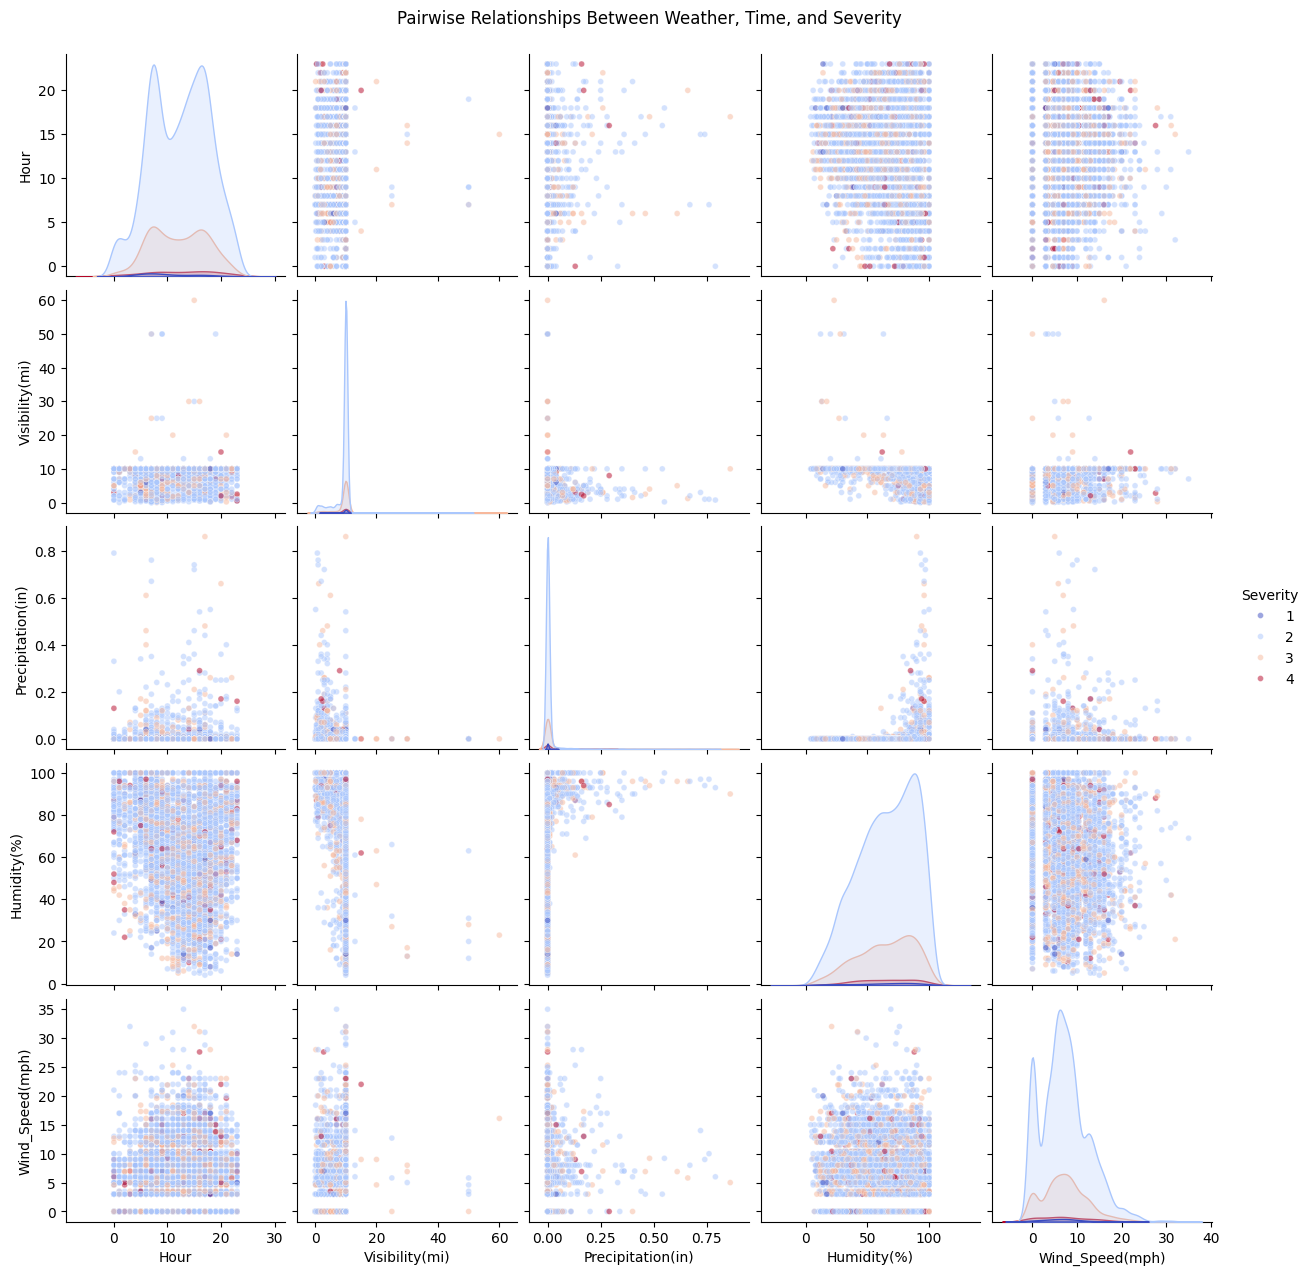

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../Data/us_accidents_sample_500k_clean.csv")

# Create hour column
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["Hour"] = df["Start_Time"].dt.hour

# Select useful numeric features + target
features = ["Hour", "Visibility(mi)", "Precipitation(in)", "Humidity(%)", "Wind_Speed(mph)", "Severity"]
subset = df[features].dropna()

# Sample to avoid overplotting
subset = subset.sample(n=5000, random_state=42)

# Pairplot with high-contrast colors
sns.pairplot(
    subset,
    hue="Severity",
    diag_kind="kde",
    palette="coolwarm",
    plot_kws={'alpha': 0.5, 's': 18}
)

plt.suptitle("Pairwise Relationships Between Weather, Time, and Severity", y=1.02)
plt.show()


# Plot heatmap

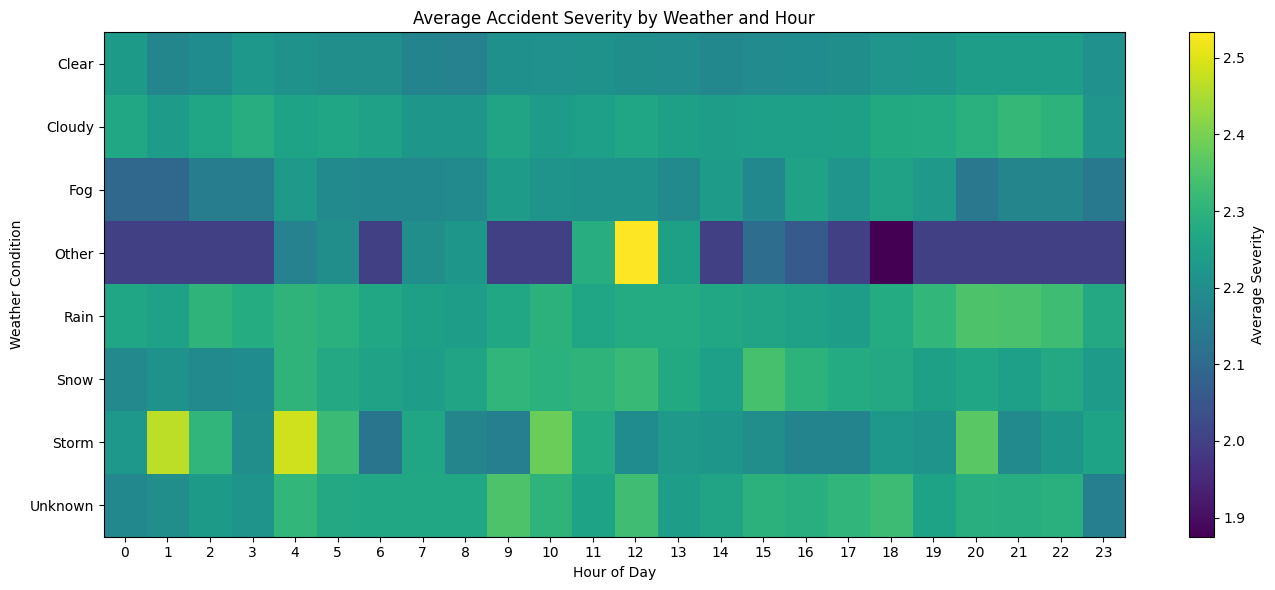

In [ ]:
subset = df[['Weather_Simple', 'Hour', 'Severity']].dropna()

plt.figure(figsize=(14, 6))

pivot = subset.pivot_table(
    index='Weather_Simple',
    columns='Hour',
    values='Severity',
    aggfunc='mean'
)

# imshow expects a 2D array, so we pass pivot.values
im = plt.imshow(pivot.values, aspect='auto')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Average Severity')

# Axis labels and ticks
plt.xticks(range(24), range(24))  # 0–23 hours
plt.yticks(range(len(pivot.index)), pivot.index)  # weather categories

plt.xlabel('Hour of Day')
plt.ylabel('Weather Condition')
plt.title('Average Accident Severity by Weather and Hour')

plt.tight_layout()
plt.show()